# Analysis of the citibike December 2015 trips dataset

## A bit of context

In this jupyter notebook, we will import, explore, prepare and analyze the data to try and get insight and answer relevant business questions.

In [259]:
# reading in necessary libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set_style('darkgrid')
%matplotlib inline

from matplotlib.ticker import FormatStrFormatter

## 1) Data exploration

We already had an idea about relevant business questions, however a first look at the data will help us identify other questions and see what information can be extracted from it.

In [260]:
# reading csv 2015 citi bike dataset
df = pd.read_csv('JC-201512-citibike-tripdata.csv')
df.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,2118,2015-12-01 00:49:31,2015-12-01 01:24:49,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,24497,Subscriber,1975.0,1
1,267,2015-12-01 01:48:34,2015-12-01 01:53:02,3186,Grove St PATH,40.719586,-74.043117,3209,Brunswick St,40.724176,-74.050656,24543,Subscriber,1982.0,1
2,119,2015-12-01 03:05:28,2015-12-01 03:07:27,3214,Essex Light Rail,40.712774,-74.036486,3183,Exchange Place,40.716247,-74.033459,24450,Subscriber,1983.0,1
3,340,2015-12-01 05:37:09,2015-12-01 05:42:49,3203,Hamilton Park,40.727596,-74.044247,3202,Newport PATH,40.727224,-74.033759,24445,Subscriber,1970.0,1
4,638,2015-12-01 05:50:32,2015-12-01 06:01:11,3207,Oakland Ave,40.737604,-74.052478,3185,City Hall,40.717732,-74.043845,24631,Subscriber,1984.0,2


In [261]:
# First look at the data
df.shape

(11838, 15)

In [262]:
df.describe()

,Trip Duration,Start Station ID,Start Station Latitude,Start Station Longitude,End Station ID,End Station Latitude,End Station Longitude,Bike ID,Birth Year,Gender
count,1.183800e+04,11838.000000,11838.000000,11838.000000,11838.000000,11838.000000,11838.000000,11838.000000,11118.000000,11838.000000
mean,1.274593e+03,3199.221997,40.723986,-74.046689,3195.291434,40.723114,-74.045749,24537.236357,1978.393866,1.137101
std,5.594387e+04,11.236070,0.008287,0.011406,73.926544,0.007973,0.011578,148.915449,9.730997,0.493301
min,6.300000e+01,3183.000000,40.697030,-74.096937,247.000000,40.697030,-74.096937,19628.000000,1941.000000,0.000000
25%,2.570000e+02,3187.000000,40.718489,-74.050656,3186.000000,40.717732,-74.050656,24448.000000,1972.000000,1.000000
50%,3.990000e+02,3201.000000,40.723659,-74.044247,3195.000000,40.721124,-74.043845,24544.000000,1981.000000,1.000000
75%,6.560000e+02,3209.000000,40.727596,-74.036486,3207.000000,40.727596,-74.036486,24629.750000,1986.000000,1.000000
max,6.065936e+06,3225.000000,40.752559,-74.032108,3225.000000,40.760875,-73.988484,24724.000000,1999.000000,2.000000


In [339]:
# Checking for missing values
df.isna().sum()

Trip Duration                0
Start Time                   0
Stop Time                    0
Start Station ID             0
Start Station Name           0
Start Station Latitude       0
Start Station Longitude      0
End Station ID               0
End Station Name             0
End Station Latitude         0
End Station Longitude        0
Bike ID                      0
User Type                    0
Birth Year                 693
Gender                       0
Start Day                    0
Stop Day                     0
Age                        693
Day Slot                   106
age_bins                   693
dtype: int64

In [264]:
# checking the missing values: it seems like all one-off users don't share personal data (age, gender) 
df[df['Birth Year'].isna()]['User Type'].value_counts()

Customer    720
Name: User Type, dtype: int64

In [265]:
df.dtypes

Trip Duration                int64
Start Time                  object
Stop Time                   object
Start Station ID             int64
Start Station Name          object
Start Station Latitude     float64
Start Station Longitude    float64
End Station ID               int64
End Station Name            object
End Station Latitude       float64
End Station Longitude      float64
Bike ID                      int64
User Type                   object
Birth Year                 float64
Gender                       int64
dtype: object

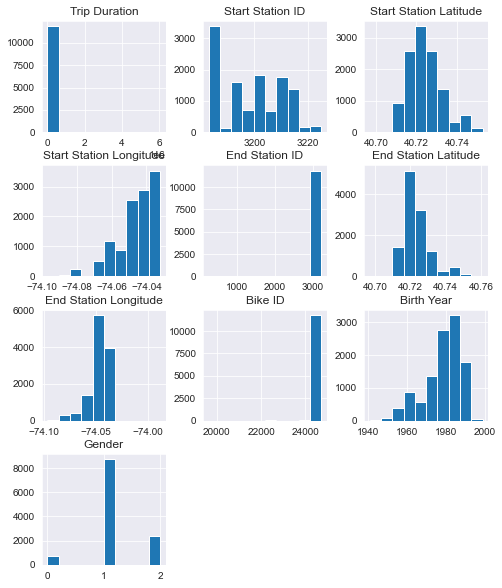

In [266]:
# quick "visual" look at the data
df.hist(figsize = (8,10));

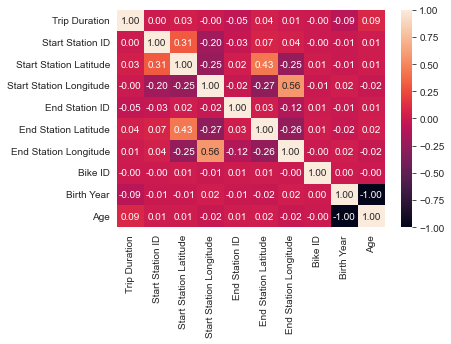

In [340]:
# heatmap to spot any potential correlation
sns.heatmap(df.corr(),annot=True,fmt='.2f');

# We can see some potential correlations below: the strongest ones appear to be between the start station
# and end station longitudes, with a correlation coefficient of 0.56, we also have a correlation coefficient of 
# 0.43 concerning start and end station latitudes. 

<AxesSubplot:>

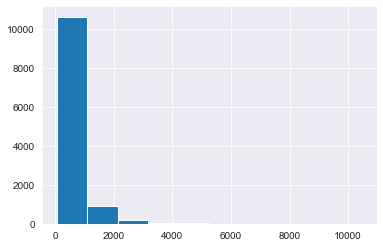

In [344]:
# Focus on trip duration: outliers make the visual very hard to examine
df['Trip Duration'].hist(bins=10)

#Uncomment the line below and change the number of bins above to 50
#plt.xlim(0,3000)

0.003632370332826491


<AxesSubplot:>

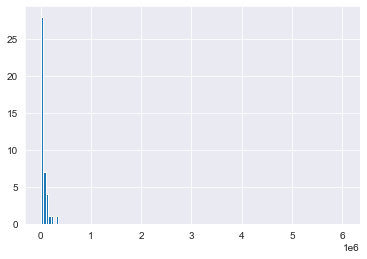

In [269]:
# We could drop outliers that have duration trips > 10800 ergo 3 hours, which represent about 0.36% of the data
print(df[df['Trip Duration']>10800].shape[0]/df.shape[0])
df[df['Trip Duration']>10800]['Trip Duration'].hist(bins=np.arange(0,6.1e6,50000))
#plt.ylim(0,10)

In [270]:
# 43 trips exhibit a duration longer than 10800s = 3h, that's about 0.36% of the data
print(df[df['Trip Duration']>10800].shape)
print(df[df['Trip Duration']>10800].shape[0]/df.shape[0])

(43, 15)
0.003632370332826491


In [271]:
# Let's have a closer look at these outliers, and try to get rid of the data that seems inconsistent
df[df['Trip Duration']>10800][['Trip Duration','Start Time','Stop Time']].sort_values('Trip Duration',ascending=False)


,Trip Duration,Start Time,Stop Time
5237,6065936,2015-12-12 21:04:35,2016-02-21 02:03:32
5234,310083,2015-12-12 21:01:46,2015-12-16 11:09:50
538,202474,2015-12-02 18:45:13,2015-12-05 02:59:48
8449,151153,2015-12-20 13:18:02,2015-12-22 07:17:15
5236,128575,2015-12-12 21:02:13,2015-12-14 08:45:09
5404,108699,2015-12-13 12:05:01,2015-12-14 18:16:41
10261,105698,2015-12-26 13:35:36,2015-12-27 18:57:14
11523,103219,2015-12-31 08:26:24,2016-01-01 13:06:44
10436,94299,2015-12-27 11:33:38,2015-12-28 13:45:17
9830,79936,2015-12-24 12:51:30,2015-12-25 11:03:46


### About the data - Trip duration outliers (trip duration > 3h):
What we see in the majority if these trip duration outliers, it's that bikes are taken and returned only the day after, we can reasonably assume that the user did not drop off his bike in the station which kept the time running, and then the bike was found and returned to a station through a mecanism (citibike, or another bike user). 

We should validate this assumption by asking citibike which will know probably know what really happen in these cases, and how to explain these unusual behaviors. 

As these outliers represent a very small faction (0.36%) of the total trips, and are not key to any of the questions we're looking at, we can reasonably drop them. Let's do so then:


In [272]:
# Let's drop these outliers then
df = df[df['Trip Duration']<=10800]

In [273]:
df.columns
df.shape

(11795, 15)

In [274]:
# converting start and stop time columns to timestamp variable type
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['Stop Time'] = pd.to_datetime(df['Stop Time'])

In [275]:
# time range of the dataset ? 1st December to 01st of Jan
print(df['Start Time'].min())
print(df['Stop Time'].max())

2015-12-01 00:49:31
2016-01-01 00:16:57


In [276]:
# getting week of the day
df['Start Day'] = df['Start Time'].dt.day_name()
df['Stop Day'] = df['Stop Time'].dt.day_name()
# are the columns the same, meaning no bike was taken around midnight and returned the day after?
# it's the case for 23 cases, but they exhibit reasonable duration trip times so we will keep those
df[(df['Start Day'] != df['Stop Day'])].shape

(23, 17)

In [345]:
# Changing the gender category labels to read it easier
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.rename_categories({0:'Unknown', 1:'Man', 2:'Woman'})
df['Gender'].head(3)

0    Man
1    Man
2    Man
Name: Gender, dtype: category
Categories (3, object): ['Unknown', 'Man', 'Woman']

In [278]:
# Adding age column for easier readability
df['Age'] = 2015 - df['Birth Year']
df['Age'].head(3)

0    40.0
1    33.0
2    32.0
Name: Age, dtype: float64

## 2) Data analysis

## After exploring the data, there are some questions we're interested in:
- What are the different gender and age groups among the bikes users?
- What days of the week and times of the day do people use more city bikes?
- What are the busiest stations?
- What are the biking habits habits the customer vs habits of the subscribers?
- What is the total usage time of bikes ? Is it a relevant indicator to spot what bikes need to be maintained more?

Let's have a look at the data and see what it tells us.

In [279]:
df.columns

Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender', 'Start Day', 'Stop Day', 'Age'],
      dtype='object')

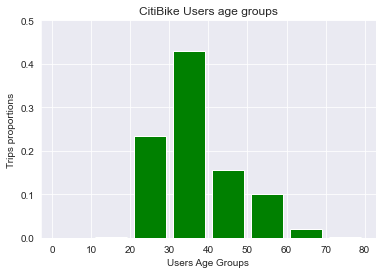

In [331]:
# Looking at the age distribution

# setting the ranges and no. of intervals
range = (0, 80)
bins = np.arange(0,90,10)
 
# plotting a histogram
plt.hist(df.Age, bins, range, color = 'green',
        histtype = 'bar', rwidth = 0.8)

max_prop = 5000/df.shape[0]
tick_props = np.arange(0,max_prop+0.1,0.1)
tick_names = [v.astype('str') for v in tick_props]
tick_names[3]='0.3'
plt.yticks(tick_props*df.shape[0],tick_names)
 
# x-axis label
plt.xlabel('Users Age Groups')
# frequency label
plt.ylabel('Trips proportions')
# plot title
plt.title('CitiBike Users age groups')
 
# function to show the plot
plt.show()

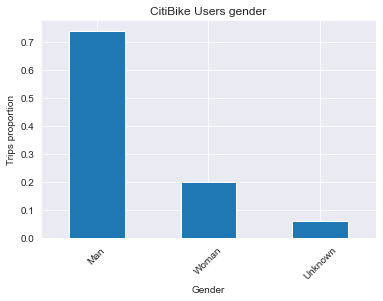

In [332]:
# Gender distribution

(df['Gender'].value_counts()/df['Gender'].shape[0]).plot(kind='bar');
plt.xticks(rotation=45);
# x-axis label
plt.xlabel('Gender')
# frequency label
plt.ylabel('Trips proportion')
# plot title
plt.title('CitiBike Users gender');

### 2.1) What are the different gender and age groups among the bikes users?

We see that by far the biggest represented category is the 30-40 years old, with about 43%, the last two age categories are the 10-20 and the 70-80 with respectively 0.18% and 0.11%.
I was expecting to see more 20-30 which comes second, as I would think they would be the population which would be most sensitive to climate change (and so contributing with clean transportation) and keen on doing a bit more activity: the 20-30 category ends up with a 23% total.

On the gender side, gentlemen represent the majority of the users with about 74% while ladies represent about 20% of the total. Note that we only have the gender for the subscribers, therefore the unknown 6% account for the one-off users, also referred to as the _Customers_. 

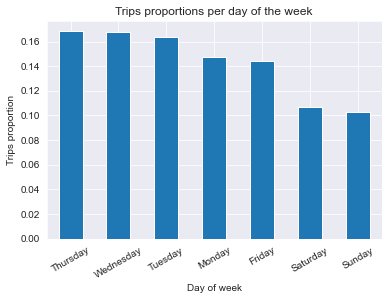

In [333]:
# what days of the week bikes are most used ?

base_color = sns.color_palette()[0];
#sns.countplot(data =df,x='Start Day',color=base_color,order =df['Start Day'].value_counts().index);
(df['Start Day'].value_counts()/df['Start Day'].value_counts().sum()).plot(kind='bar')
# x-axis label
plt.xlabel('Day of week')
plt.xticks(rotation=30);
# frequency label
plt.ylabel('Trips proportion')
# plot title
plt.title('Trips proportions per day of the week');

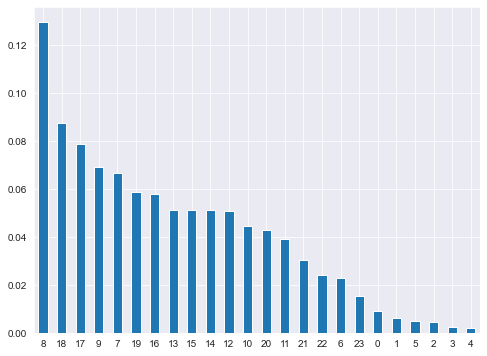

In [283]:
# time of the day when bikes are used
(df["Start Time"].dt.hour.value_counts()/df["Start Time"].dt.hour.value_counts().sum()).plot(kind='bar',figsize=(8,6));
plt.xticks(rotation=0,);

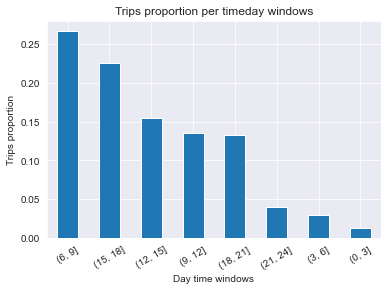

In [334]:
# Arranging the data per day timeslot so we can easily represent what parts of the day are the citibikes most used
# We chose a 3h duration for each timeslot, you can also try it with 2 or 4, just change the step in the np.arange
# below!

df["Day Slot"] = pd.cut(x=df["Start Time"].dt.hour, bins=np.arange(0,25,3))
(df["Day Slot"].value_counts()/df["Day Slot"].value_counts().sum()).plot(kind=('bar'))
# x-axis label
plt.xlabel('Day time windows')
plt.xticks(rotation=30);
# frequency label
plt.ylabel('Trips proportion')
# plot title
plt.title('Trips proportion per timeday windows');

### 2.2) What days of the week and times of the day do people use more citibikes?

Concerning the days of the week where citibikes are most used:
- Thursday(16.8%), Wednesday(16.75%) and Tuesday(16.3%) represent a close top 3 
- Monday and Friday with a bit more than 14% both
- The weekend with around 10% for Saturday and Sunday
That would indicate that bikes are more used for commuting to work/school, than in the weekend to go around the city.

For the slots of the day:
- (6-9am) and (3-6pm) represent the majority of the trip starts, which, looking at the hour supports the assumption that people use mostly bikes for commuting to work or school.
- Least used slots are (9pm-midnight), (3-6am) and (midnight-3am) with less than 5% each 

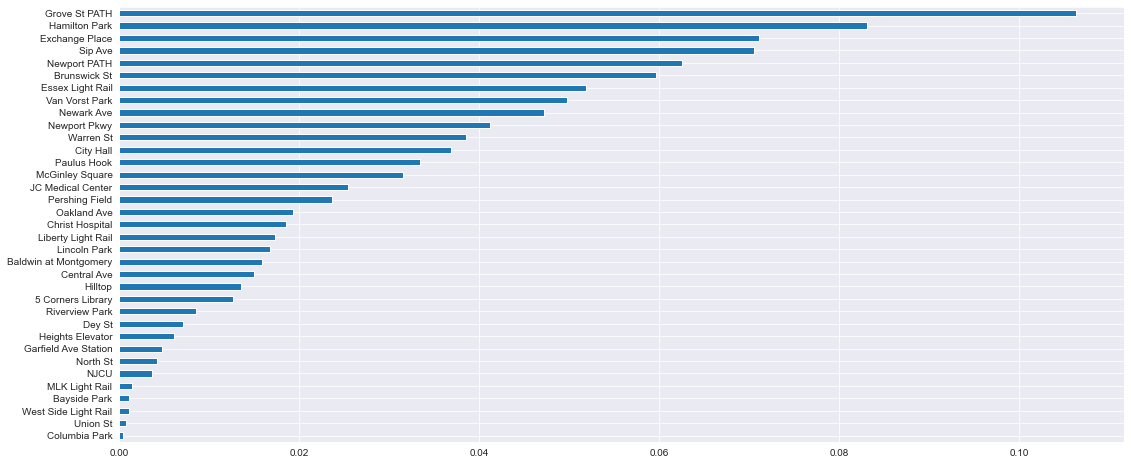

In [285]:
# busiest start stations
start_station = df['Start Station Name'].value_counts()/df['Start Station Name'].value_counts().sum()
ax = start_station.plot(kind='barh',figsize=(18,8))
ax.invert_yaxis()

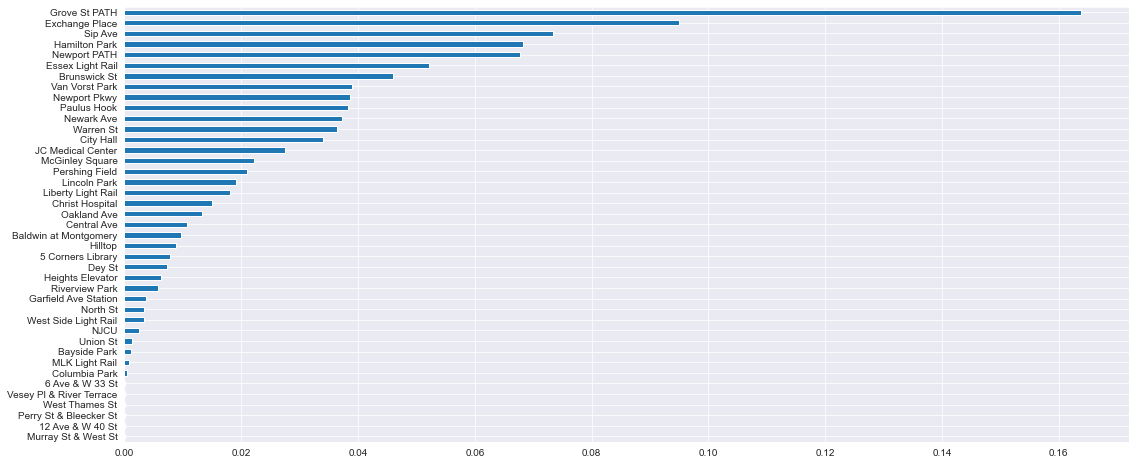

In [286]:
# busiest end stations
end_station = df['End Station Name'].value_counts()/df['End Station Name'].value_counts().sum()
ax = end_station.plot(kind='barh',figsize=(18,8))
ax.invert_yaxis()

In [287]:
# Number of start and end stations non identical
print(df['Start Station Name'].value_counts().count())
print(df['End Station Name'].value_counts().count())

35
41


In [319]:
# Arranging the data to plot grouped chart to examine the overall traffic (start + end)
stations_traffic = pd.concat([start_station,end_station],axis=1)

# We consider that indexes appearing in end station columns and not in start stations as having 0 occurences
# in the start stations
stations_traffic['Start Station Name'] = stations_traffic['Start Station Name'].fillna(0)

# sorting the values by overall traffic
stations_traffic['Station Frequency'] = stations_traffic['Start Station Name'] + stations_traffic['End Station Name']
stations_traffic = stations_traffic.sort_values('Station Frequency',ascending=False)
stations_traffic.head()['Station Frequency']


Grove St PATH     0.270114
Exchange Place    0.166003
Hamilton Park     0.151335
Sip Ave           0.143959
Newport PATH      0.130309
Name: Station Frequency, dtype: float64

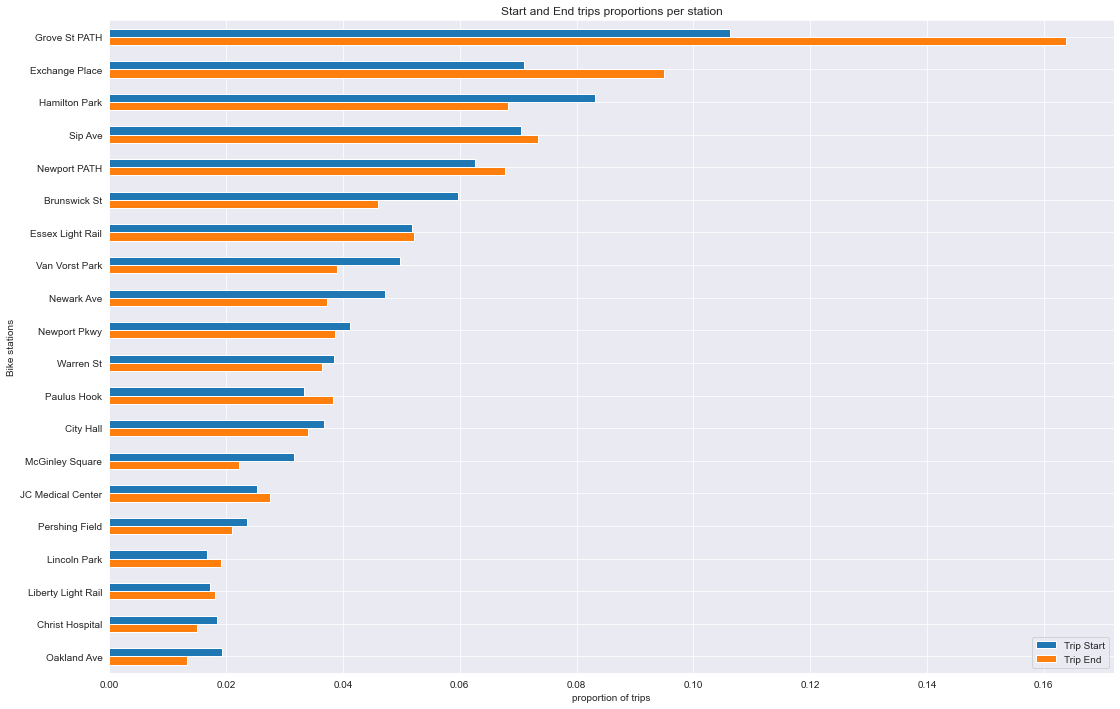

In [349]:
# Busiest stations by overall (start+end) traffic
stations_traffic = stations_traffic.rename(columns={'Start Station Name':'Trip Start','End Station Name':'Trip End'})

ax = stations_traffic[['Trip Start','Trip End']][:20].plot.barh(figsize=(18,12))
ax.invert_yaxis()

# let's create a function that allow us to simply display the x and y plot labels and title

def labels_and_title(xlabel,ylabel,title):
    
    '''
    INPUT:
    xlabel - label we want to see in the x axis
    ylabel - label we want to display in the y axis
    title - chart title
    
    OUTPUT:
    plt.xlabel(xlabel) - displays the x axis label
    plt.ylabel(ylabel) - displays the y axis label
    plt.title(title) - displays the chart title
    '''
    
    return plt.xlabel(xlabel), plt.ylabel(ylabel), plt.title(title)
    
labels_and_title('proportion of trips','Bike stations','Start and End trips proportions per station');

# x-axis label
#plt.xlabel('proportion of trips')
# frequency label
#plt.ylabel('Bike stations')
# plot title
#plt.title('Start and End trips proportions per station');


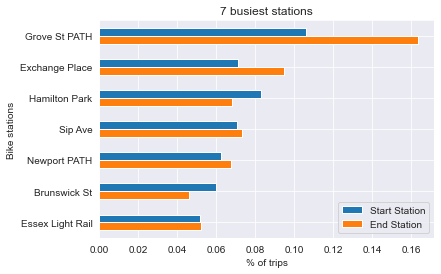

In [290]:
# Top 7 Busiest stations by overall (start+end) traffic
ax = stations_traffic[['Start Station','End Station']][0:7].plot.barh()
ax.invert_yaxis()
# x-axis label
plt.xlabel('% of trips')
# frequency label
plt.ylabel('Bike stations')
# plot title
plt.title('7 busiest stations');

### 2.3) What are the busiest stations?

For every trip, we have the start station and obviously the end station. Here above we combine the start and end station traffic to have an overall view of what stations are the busiest and the most used, to either drop or collect a bike for a ride in the city. We calculate the total traffic by adding the % of start and end traffic for each stations.

Looking at the graph containing all stations (and both start and end traffic), we see that there is for about a dozen of stations where we have an unbalance in terms of traffic distribution between the start and end traffic. That means that, for these stations % of start trip and end trip have a significant delta. It is particularly obvious in the first station: Grove St PATH that has a 10.5% start trips vs 16% of end trips. It would be interesting to further investigate why this station in particular has such an unbalance, and how does the citibike system deals with it.

In terms of overall traffic, the end and start traffic follow the same trends, and the busiest stations are:
- Grove St PATH with 27%
- Exchange Place with 17%
- Hamilton Park with 15%

In [291]:
# Having a look now at the trip duration distribution against multiple variables

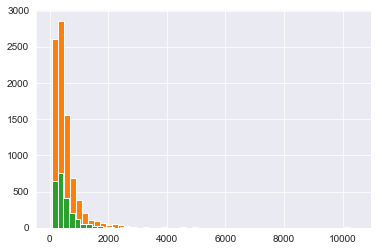

In [292]:
# Distribution per gender

# Uncomment the line below for a clearer view 
#plt.xlim(0,3000)
df.groupby('Gender')['Trip Duration'].hist(bins=50);

In [293]:
df['age_bins'] = pd.cut(x=df['Age'], bins=[0,20,30,40,60,80])

In [294]:
df['age_bins'].value_counts()

(30, 40]    4750
(20, 30]    3233
(40, 60]    2865
(60, 80]     233
(0, 20]       21
Name: age_bins, dtype: int64

(0.0, 2000.0)

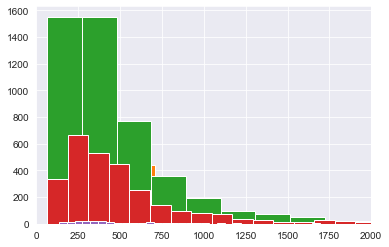

In [295]:
# Distribution per age group

df.groupby('age_bins')['Trip Duration'].hist(bins=50)
plt.xlim(0,2000)

(0.0, 2000.0)

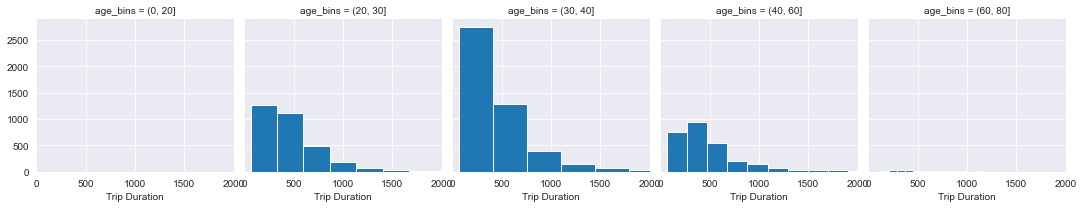

In [296]:
# Trip duration distribution per age group: clearer view with faceting 
g = sns.FacetGrid(data=df,col='age_bins')
g.map(plt.hist,'Trip Duration',bins=30)
plt.xlim(0,2000)

(0.0, 3000.0)

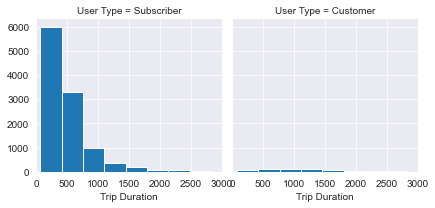

In [297]:
# Trip duration distribution per User type
g = sns.FacetGrid(data=df,col='User Type')
g.map(plt.hist,'Trip Duration',bins=30)
plt.xlim(0,3000)

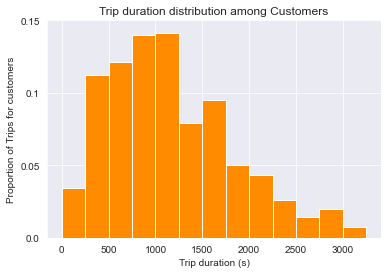

In [335]:
# Let's have a closer look to the trip duration distribution per User type

df[df['User Type']=='Customer']['Trip Duration'].hist(bins=np.arange(0,3500,250),color = "darkorange")

# plotting frequencies
max_prop = 100/df[df['User Type']=='Customer'].shape[0];
tick_props = np.arange(0,max_prop+0.05,0.05);
tick_props[3]='0.15'
tick_names = [v.astype('str') for v in tick_props];
plt.yticks(tick_props*df[df['User Type']=='Customer'].shape[0],tick_names);

# x-axis label
plt.xlabel('Trip duration (s)')
# frequency label
plt.ylabel('Proportion of Trips for customers')
# plot title
plt.title('Trip duration distribution among Customers');

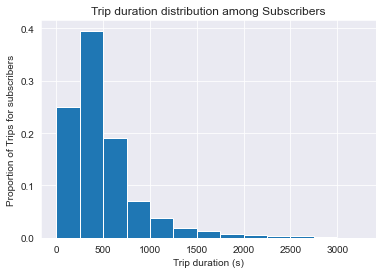

In [336]:
df[df['User Type']=='Subscriber']['Trip Duration'].hist(bins=np.arange(0,3500,250))#.hist

# plotting frequencies
max_prop = 4100/df[df['User Type']=='Subscriber'].shape[0];
tick_props = np.arange(0,max_prop+0.1,0.1);
tick_props[3]='0.3'
tick_names = [v.astype('str') for v in tick_props];
plt.yticks(tick_props*df[df['User Type']=='Subscriber'].shape[0],tick_names);

# x-axis label
plt.xlabel('Trip duration (s)')
# frequency label
plt.ylabel('Proportion of Trips for subscribers')
# plot title
plt.title('Trip duration distribution among Subscribers');

In [300]:
# Users type habits and profile: trip duration
df.groupby('User Type')['Trip Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
User Type,,,,,,,,
Customer,693.0,1620.141414,1602.928531,75.0,705.0,1160.0,1883.0,10454.0
Subscriber,11102.0,513.490452,490.398754,63.0,250.0,382.0,607.0,10425.0


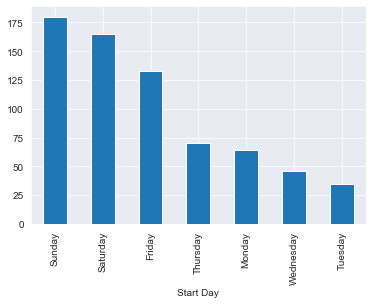

In [301]:
# User types type habits: citibikes usage per days of the week
df.groupby('User Type')['Start Day'].value_counts()['Customer'].plot(kind='bar');

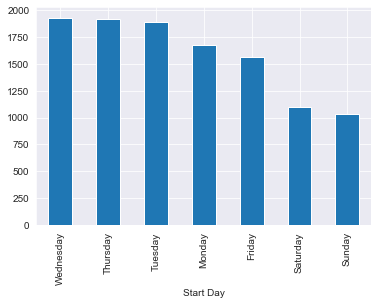

In [302]:
df.groupby('User Type')['Start Day'].value_counts()['Subscriber'].plot(kind='bar');

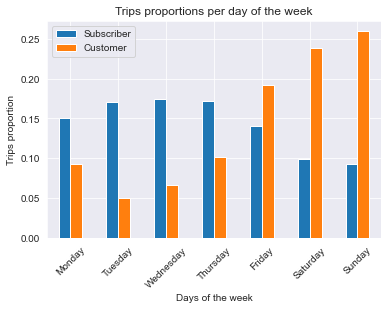

In [338]:
# Let's plot a graph to compare both use types day of the week habits
subscriber_days = df.groupby('User Type')['Start Day'].value_counts()['Subscriber']/df.groupby('User Type')['Start Day'].value_counts()['Subscriber'].sum()
customer_days = df.groupby('User Type')['Start Day'].value_counts()['Customer']/df.groupby('User Type')['Start Day'].value_counts()['Customer'].sum()
user_day = pd.concat([subscriber_days,customer_days],axis=1)
user_day.columns=['Subscriber','Customer']
week_ordered = [ 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
user_day = user_day.reindex(week_ordered)

ax = user_day[['Subscriber','Customer']].plot.bar()
#ax.invert_yaxis()

# x-axis label
plt.xlabel('Days of the week')
plt.xticks(rotation=45);
# frequency label
plt.ylabel('Trips proportion')
# plot title
plt.title('Trips proportions per day of the week');


### 2.4) What are the differences of habits between customers (one-off users) and subscribers?

For starters, in our data the customers (one-off users) represent a small fraction of our dataset, about 6%. That means that the findings we saw before was more representative of the behavior and habits of the subscribers which form the very big majority of the dataset.

To examine the differences of habits (trip duration and on what days) between the customers and subscribers, we studied separately the subset of each user type.

There are some interesting differences between these two user types behavior, starting with the duration of each cycle ride: 
- on average a one off user cycles more than three times the subscribers, 27min against 8min30s for subscribers
- customers use the citibikes mainly on the weekends and Fridays (around 67% in total), which is the time where the number are the lowest for subscribers (with a total of 32% of the total trips in a week)

As expected, susbscribers use their bike on a more regular basis for everyday commuting, while one-off customers would use it occasionally during the weekend for a ride in the city.

In [304]:
# Having a look at each bike duration usage
df.groupby(['Bike ID'])['Trip Duration'].sum().sort_values(ascending=False)

Bike ID
24633    58255
24448    56936
24602    54273
24656    53871
24391    53725
         ...  
24638     1821
24590     1152
24691     1139
19628      262
24428      143
Name: Trip Duration, Length: 260, dtype: int64

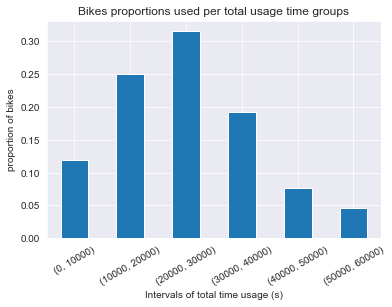

In [326]:
# Grouping the bikes usage durations to see what bikes are most used

bike_usage_1 = df.groupby(['Bike ID'])['Trip Duration'].sum().sort_values(ascending=False)
bike_usage_2 = pd.cut(x=bike_usage_1, bins=np.arange(0,70000,10000))

bike_usage = pd.concat([bike_usage_1,bike_usage_2],axis=1)
bike_usage.columns = ['Trip Duration','Trip Duration Interval']

interval_order = ['(0, 10000)','(10000, 20000)','(20000, 30000)','(30000, 40000)','(40000, 50000)','(50000, 60000)']
bike_interval = bike_usage['Trip Duration Interval'].value_counts()
bike_interval.index = ['(20000, 30000)','(10000, 20000)','(30000, 40000)','(0, 10000)','(40000, 50000)','(50000, 60000)']

bike_interval = bike_interval.reindex(interval_order)
(bike_interval/bike_interval.sum()).plot.bar()
# x-axis label
plt.xlabel('Intervals of total time usage (s)')
plt.xticks(rotation=30);
# frequency label
plt.ylabel('proportion of bikes')
# plot title
plt.title('Bikes proportions used per total usage time groups');


### 2.5) What are the total usage times for the different bikes?

For this part, I was particularly interested in how the bikes were used and what was  the total cumulated time for the bikes. That would allow us to see if there are bikes that are more used than others, and perhaps keeping track of these bikes could allow us to trigger a maintenance procedure for them, after a certain threshold of total time usage for example.

What we can see that:
- The biggest proportion (about 30%) of bikes are used between 5.5 and 8.3 hours (20k-30k seconds interval)
- About 12% of the bikes (two last intervals cumulated) are use more than others and cumulate a total between 11 and 16.6 hours of usage in December.

I suspect the majority of the most used bikes are linked to the busiest stations that we saw in question 2.3, I'll let you deep dive on this part to confirm/infirm this point!